# Label Encoder

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder # encode chaque colonne en valeur numérique

In [2]:
X = np.array(['Chat','Chien','Chat','Oiseau'])

In [3]:
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [4]:
transformer.transform(X)

array([0, 1, 0, 2])

In [5]:
transformer.fit_transform(X)

array([0, 1, 0, 2])

In [6]:
transformer.inverse_transform(np.array([0,0,2,2])) # permet de décoder 

array(['Chat', 'Chat', 'Oiseau', 'Oiseau'], dtype='<U6')

# Ordinal Encoder

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
X = np.array([['Chat','Poils'],
              ['Chien','Poils'],
              ['Chat','Poils'],
              ['Oiseau', 'Plumes']])

In [9]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

# Encodage One Hot

In [14]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [11]:
y = np.array(['Chat','Chien','Chat','Oiseau'])

In [13]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [15]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# La normalisation 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = np.array([[70], [80], [120]])

In [18]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [24]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

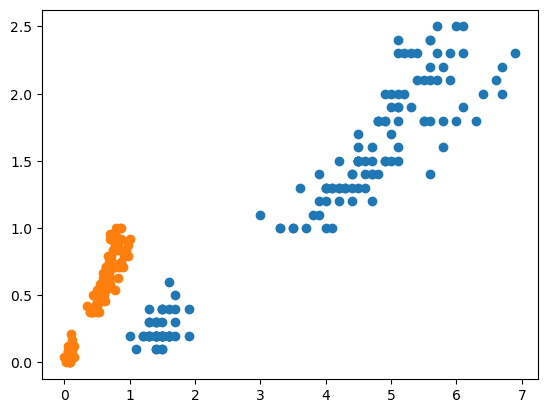

In [27]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:,2], X[:,3],)
plt.scatter(X_minmax[:,2], X_minmax[:,3])
plt.show()

# StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
X = np.array([[70], [80], [120]])

In [31]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

# PolynomialFeatures

In [25]:
from sklearn.preprocessing import PolynomialFeatures # crée de nouvelles variables polynômiales à partir des variables existants

In [34]:
X = np.array([[1], [2], [0.5]])

In [36]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

# PowerTransformer

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PowerTransformer

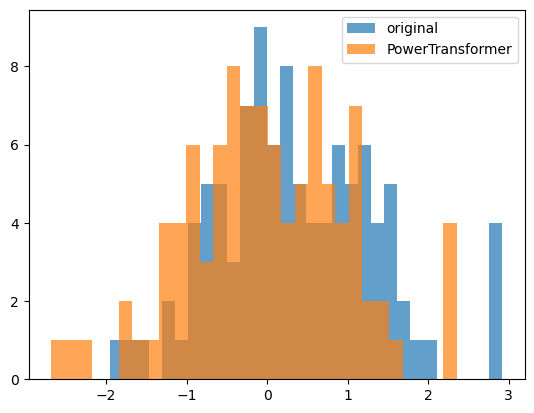

In [3]:
np.random.seed(0)
X = np.random.rand(100, 2) + np.random.randn(100, 2)

X2 = PowerTransformer().fit_transform(X)
plt.hist(X[:,0], bins=30, alpha=0.7, label='original')
plt.hist(X2[:,0], bins=30, alpha=0.7, label='PowerTransformer')
plt.legend()
plt.show()

# Discrétisation

In [4]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [5]:
X = np.linspace(0,5,10).reshape((10,1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [6]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [7]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Transfomer personalisable

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [10]:
X = np.linspace(1,5,10).reshape((-1,1))

In [11]:
Mon_transformer = FunctionTransformer(func = np.log1p, inverse_func = np.expm1)

In [12]:
Mon_transformer.fit_transform(X)

array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

# Pipeline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [17]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=5)

In [20]:
# Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator 
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

# Test 
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [21]:
from sklearn.pipeline import make_pipeline

In [23]:
model =make_pipeline(StandardScaler(),SGDClassifier())
model.fit(X_train, y_train)
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

# GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

In [28]:
model = make_pipeline(PolynomialFeatures(), StandardScaler()
                      ,SGDClassifier(random_state=0))

params = {
    'polynomialfeatures__degree': [2,3,4],
    'sgdclassifier__penalty': ['l1','l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [29]:
grid.score(X_test, y_test)

0.9666666666666667